In [157]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [2]:
def import_VCF4_to_pandas(vcf_file, sep='\t'):
    with open(vcf_file) as f:
        first_line = f.readline().strip()
    if first_line.endswith('VCFv4.0'):
        #Use first line as header
        dataframe = pd.read_csv(vcf_file, sep=sep, skiprows=[16], header=16)
        dataframe[['DP', 'AF', 'SB', 'DP4']] = dataframe['INFO'].str.split(r';.{1,3}=', expand=True)
        dataframe.DP = dataframe.DP.str.split('=').str[1]
        """
        DF4 = Number of :
        1) forward ref alleles; 
        2) reverse ref; 
        3) forward non-ref; 
        4) reverse non-ref alleles, used in variant calling. 
        Sum can be smaller than DP because low-quality bases are not counted.
        """
        dataframe[['Fref', 'Rref', 'Fsample', 'Rsample']] = dataframe['DP4'].str.split(',', expand=True)
        dataframe[['DP', 'AF', 'SB','Fref', 'Rref', 'Fsample', 'Rsample']] = dataframe[['DP', 'AF', 'SB','Fref', 'Rref', 'Fsample', 'Rsample']].astype(float)
    return dataframe

def replace_nucleotide(list_fasta, postition, nucleotide):
    list_fasta[postition] = nucleotide

#def replace_fasta_sequence(fasta, Nref, Nalt, position)


def replace_fasta_sequence(fasta, Nref_list, Nalt_list, position):
    
    fasta_to_replace = SeqIO.read(fasta,"fasta")
    sequence_to_replace = fasta_to_replace.seq
    sequence_list = list(sequence_to_replace)
    
    for index in range (len(position)):

        nucleotide_list = ['A','T','C','G']
        
        Nref = Nref_list[index]
        Nalt = Nalt_list[index]
    
        if Nref in nucleotide_list:
            nucleotide_list.remove(Nref)
        if Nalt in nucleotide_list:
            nucleotide_list.remove(Nalt)
        
        
        base_to_replace_with = nucleotide_list[0]

        
        sequence_list[position[index] - 1] = base_to_replace_with
        
    return "".join(sequence_list)
    #print(record_to_chop.seq[0:4])

In [81]:
vcf_PAIR15050='test/PAIR1_50_50.vcf'
vcf_PAIR18020='test/PAIR1_80_20.vcf'
vcf_PAIR19010='test/PAIR1_90_10.vcf'


reference="data/MTB_ancestorII_reference.fas"

fasta_to_replace = SeqIO.read(reference,"fasta")

sample_name = "PAIR1_50_50"

vcf_PAIR15050_df = import_VCF4_to_pandas(vcf_PAIR15050)
vcf_PAIR18020_df = import_VCF4_to_pandas(vcf_PAIR18020)
vcf_PAIR19010_df = import_VCF4_to_pandas(vcf_PAIR19010)


new_reference_seq = replace_fasta_sequence(reference,vcf_PAIR15050_df['REF'],vcf_PAIR15050_df['ALT'],vcf_PAIR15050_df['POS'])
new_reference_id = "%s_%s" % (fasta_to_replace.id, sample_name)

Output_new_reference = "Ancestor_PAIR15050.fasta"

#Create seqIO object
new_reference = SeqRecord(Seq(new_reference_seq), id = new_reference_id, description = "")


with open(Output_new_reference, "w") as output_handle:
    SeqIO.write(new_reference, output_handle, "fasta")

In [4]:
print(fasta_to_replace.seq[0:41])

TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAA


In [5]:
print(new_reference_seq[0:41])

TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAA


In [6]:
vcf_PAIR15050_df.head(10)

#CHROM   POS ID REF ALT  QUAL FILTER  \
0  MTB_anc  1977  .   G   A   190   PASS   
1  MTB_anc  2532  .   C   T  3926   PASS   
2  MTB_anc  6140  .   G   T  1262   PASS   
3  MTB_anc  6769  .   C   T   140   PASS   
4  MTB_anc  6775  .   G   T   134   PASS   
5  MTB_anc  6784  .   C   A   208   PASS   
6  MTB_anc  6793  .   T   C   134   PASS   
7  MTB_anc  6796  .   C   T   211   PASS   
8  MTB_anc  6798  .   G   A   220   PASS   
9  MTB_anc  6799  .   C   G   195   PASS   

                                      INFO     DP        AF   SB          DP4  \
0       DP=14;AF=0.571429;SB=0;DP4=4,1,6,2   14.0  0.571429  0.0      4,1,6,2   
1    DP=136;AF=1.000000;SB=0;DP4=0,0,72,64  136.0  1.000000  0.0    0,0,72,64   
2  DP=164;AF=0.335366;SB=0;DP4=57,52,28,27  164.0  0.335366  0.0  57,52,28,27   
3    DP=187;AF=0.048128;SB=1;DP4=93,85,4,5  187.0  0.048128  1.0    93,85,4,5   
4    DP=188;AF=0.047872;SB=1;DP4=91,86,4,5  188.0  0.047872  1.0    91,86,4,5   
5    DP=187;AF=0.064171;SB=2;DP4=91,84,5,7  187.0  0.064171  2.0    91,84,5,7   
6    DP=188;AF=0.058511;SB=0;DP4=89,88,5,6  188.0  0.058511  0.0    89,88,5,6   
7    DP=185;AF=0.064865;SB=0;DP4=86,87,6,6  185.0  0.064865  0.0    86,87,6,6   
8    DP=184;AF=0.070652;SB=0;DP4=85,86,6,7  184.0  0.070652  0.0    85,86,6,7   
9    DP=183;AF=0.060109;SB=0;DP4=86,86,5,6  183.0  0.060109  0.0    86,86,5,6   

   Fref  Rref  Fsample  Rsample  
0   4.0   1.0      6.0      2.0  
1   0.0   0.0     72.0     64.0  
2  57.0  52.0     28.0     27.0  
3  93.0  85.0      4.0      5.0  
4  91.0  86.0      4.0      5.0  
5  91.0  84.0      5.0      7.0  
6  89.0  88.0      5.0      6.0  
7  86.0  87.0      6.0      6.0  
8  85.0  86.0      6.0      7.0  
9  86.0  86.0      5.0      6.0

In [29]:
vcf_PAIR15050_df.dtypes

#CHROM      object
POS          int64
ID          object
REF         object
ALT         object
QUAL         int64
FILTER      object
INFO        object
DP         float64
AF         float64
SB         float64
DP4         object
Fref       float64
Rref       float64
Fsample    float64
Rsample    float64
dtype: object

In [9]:
vcf_PAIR15050_df.head(5)

#CHROM   POS ID REF ALT  QUAL FILTER  \
0  MTB_anc  1977  .   G   A   190   PASS   
1  MTB_anc  2532  .   C   T  3926   PASS   
2  MTB_anc  6140  .   G   T  1262   PASS   
3  MTB_anc  6769  .   C   T   140   PASS   
4  MTB_anc  6775  .   G   T   134   PASS   

                                      INFO     DP        AF   SB          DP4  \
0       DP=14;AF=0.571429;SB=0;DP4=4,1,6,2   14.0  0.571429  0.0      4,1,6,2   
1    DP=136;AF=1.000000;SB=0;DP4=0,0,72,64  136.0  1.000000  0.0    0,0,72,64   
2  DP=164;AF=0.335366;SB=0;DP4=57,52,28,27  164.0  0.335366  0.0  57,52,28,27   
3    DP=187;AF=0.048128;SB=1;DP4=93,85,4,5  187.0  0.048128  1.0    93,85,4,5   
4    DP=188;AF=0.047872;SB=1;DP4=91,86,4,5  188.0  0.047872  1.0    91,86,4,5   

   Fref  Rref  Fsample  Rsample  
0   4.0   1.0      6.0      2.0  
1   0.0   0.0     72.0     64.0  
2  57.0  52.0     28.0     27.0  
3  93.0  85.0      4.0      5.0  
4  91.0  86.0      4.0      5.0

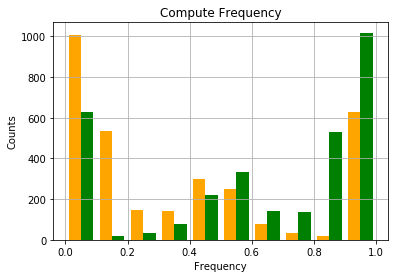

In [11]:
x = vcf_PAIR15050_df['AF']
reference = 1 - vcf_PAIR15050_df['AF']

plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Compute Frequency')
plt.grid(True)

plt.hist([x, reference], color=['orange', 'green']) 
plt.show()

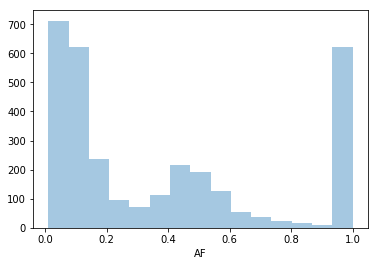

In [12]:
x = vcf_PAIR15050_df['AF']
espejo = 1 -vcf_PAIR15050_df['AF']

sns.distplot(x, kde=False, rug=False)
#sns.distplot(espejo, kde=False, rug=False)

In [156]:
vcf_PAIR15050_df['AF'].mean(axis = 0) 

0.387087770184361

In [195]:
def scatter_vcf(vcf_df):
    y = vcf_df['AF'][vcf_df['AF'] < 1]
    x = vcf_df['AF'][vcf_df['AF'] < 1].index.values
    
    mean = vcf_df['AF'].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < 1] > mean,'c','r')
    
    plt.figure(figsize=(50,20))
    plt.margins(x=0.01, y=0.01, tight=True)

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    plt.grid(True)
    

    plt.scatter(x, y, color=col_mean, alpha=0.5, s=200) # colormap='jet'
    plt.show()
    

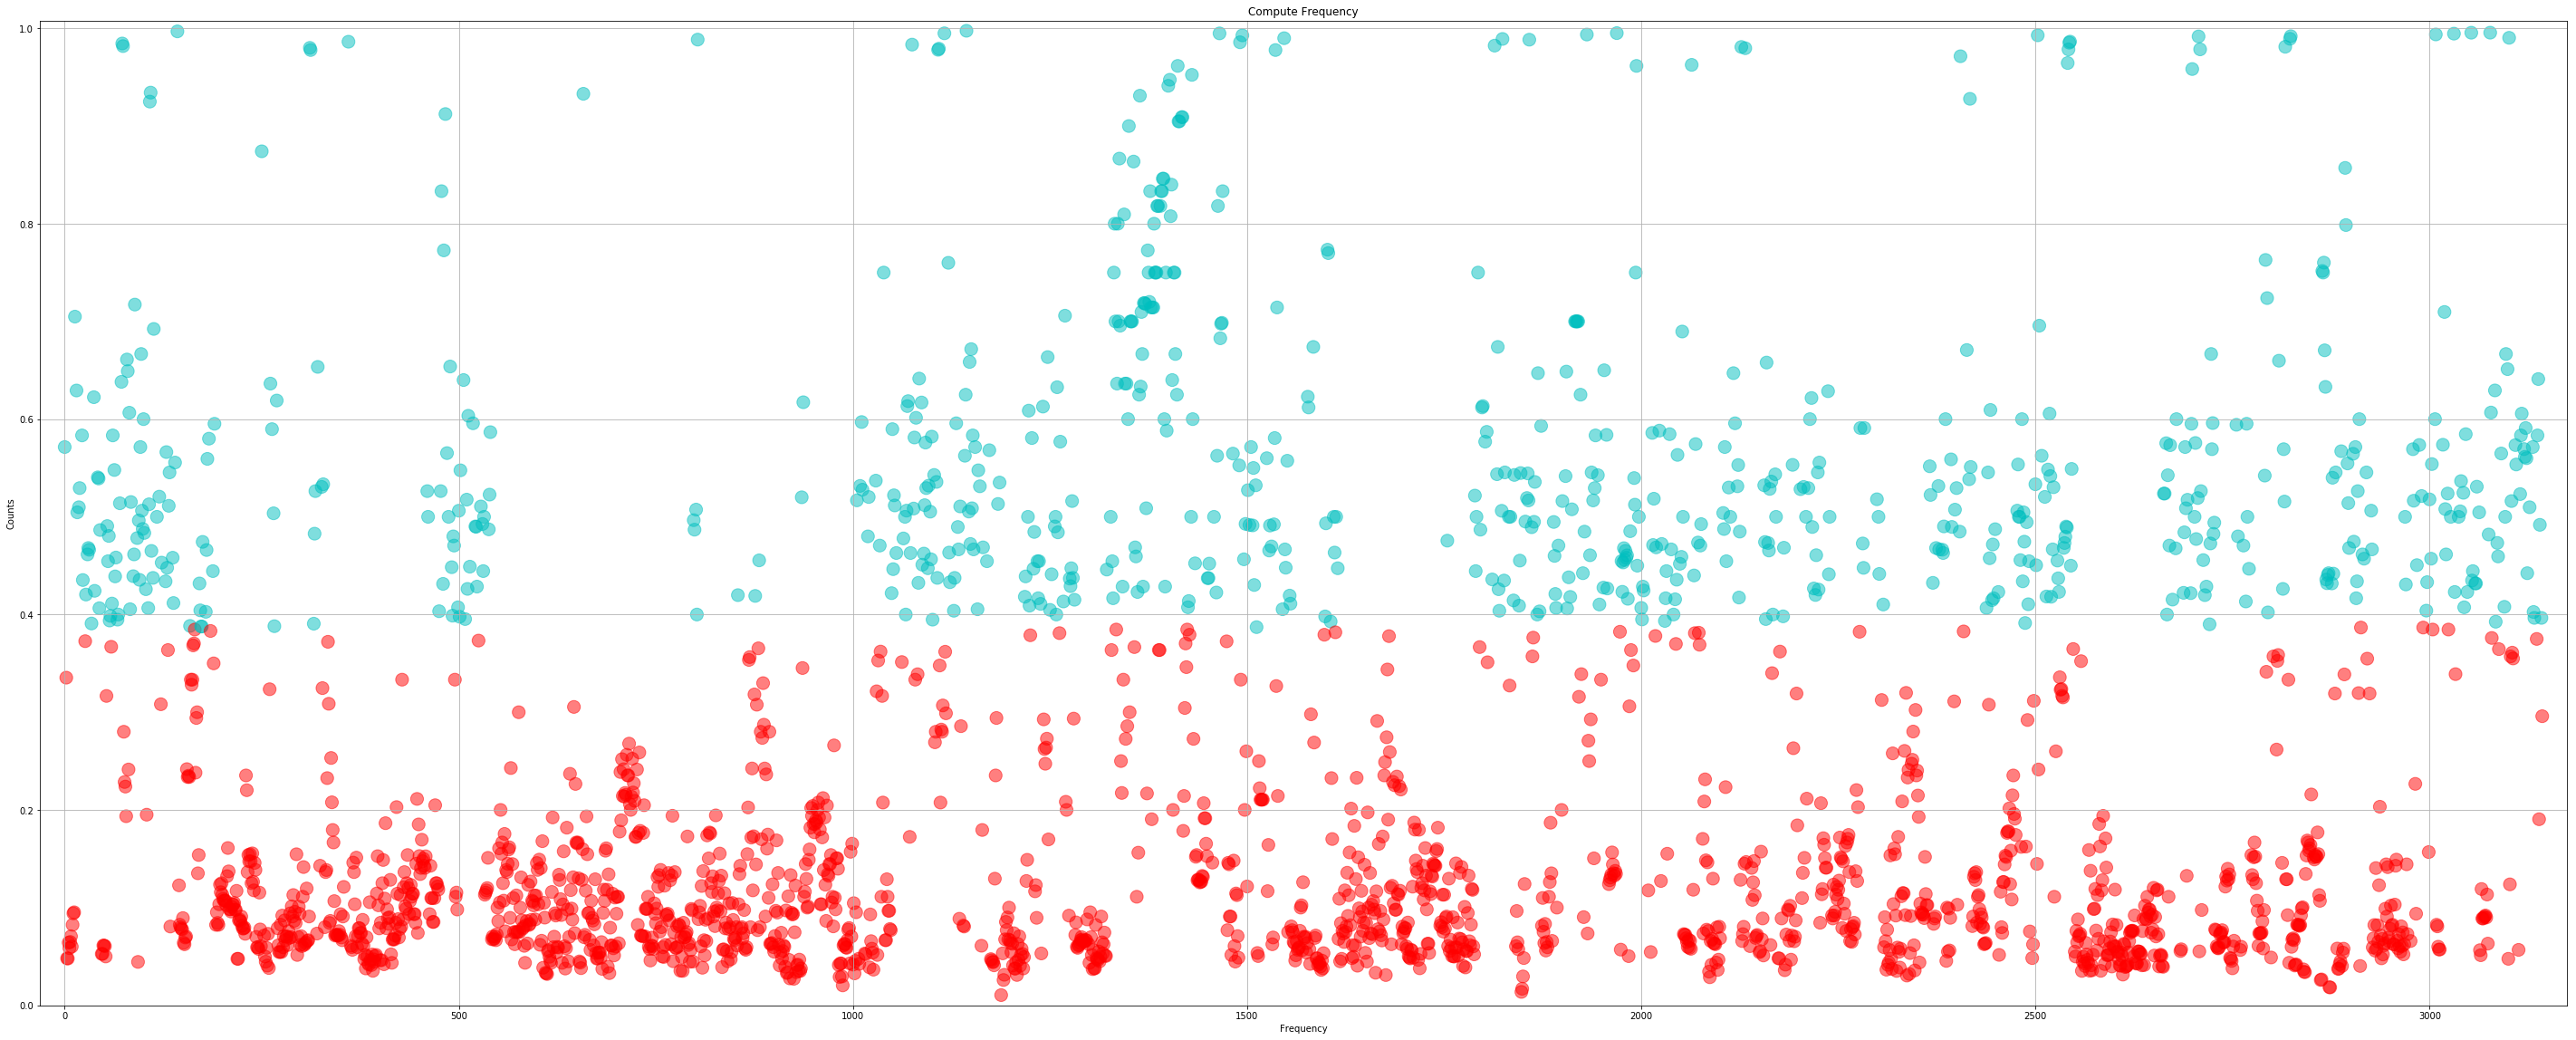

In [196]:
scatter_vcf(vcf_PAIR15050_df)

In [219]:
def scatter_vcf_pos(vcf_df):
    y = vcf_df['AF'][vcf_df['AF'] < 1]
    x = vcf_df['POS'][vcf_df['AF'] < 1]
    plt.figure(figsize=(100,25))
    plt.margins(x=0.01, y=0.01, tight=True)
    
    mean = vcf_df['AF'][vcf_df['AF'] < 1].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < 1] > mean,'c','salmon')

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='1', color='k')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='1', color='k')
    
    # Turn on/off the display of all ticks.
    plt.tick_params(which='minor', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn on bottom ticks
    #plt.grid(True)

    plt.scatter(x, y, color=col_mean, alpha=0.5, s=300)
    plt.show()

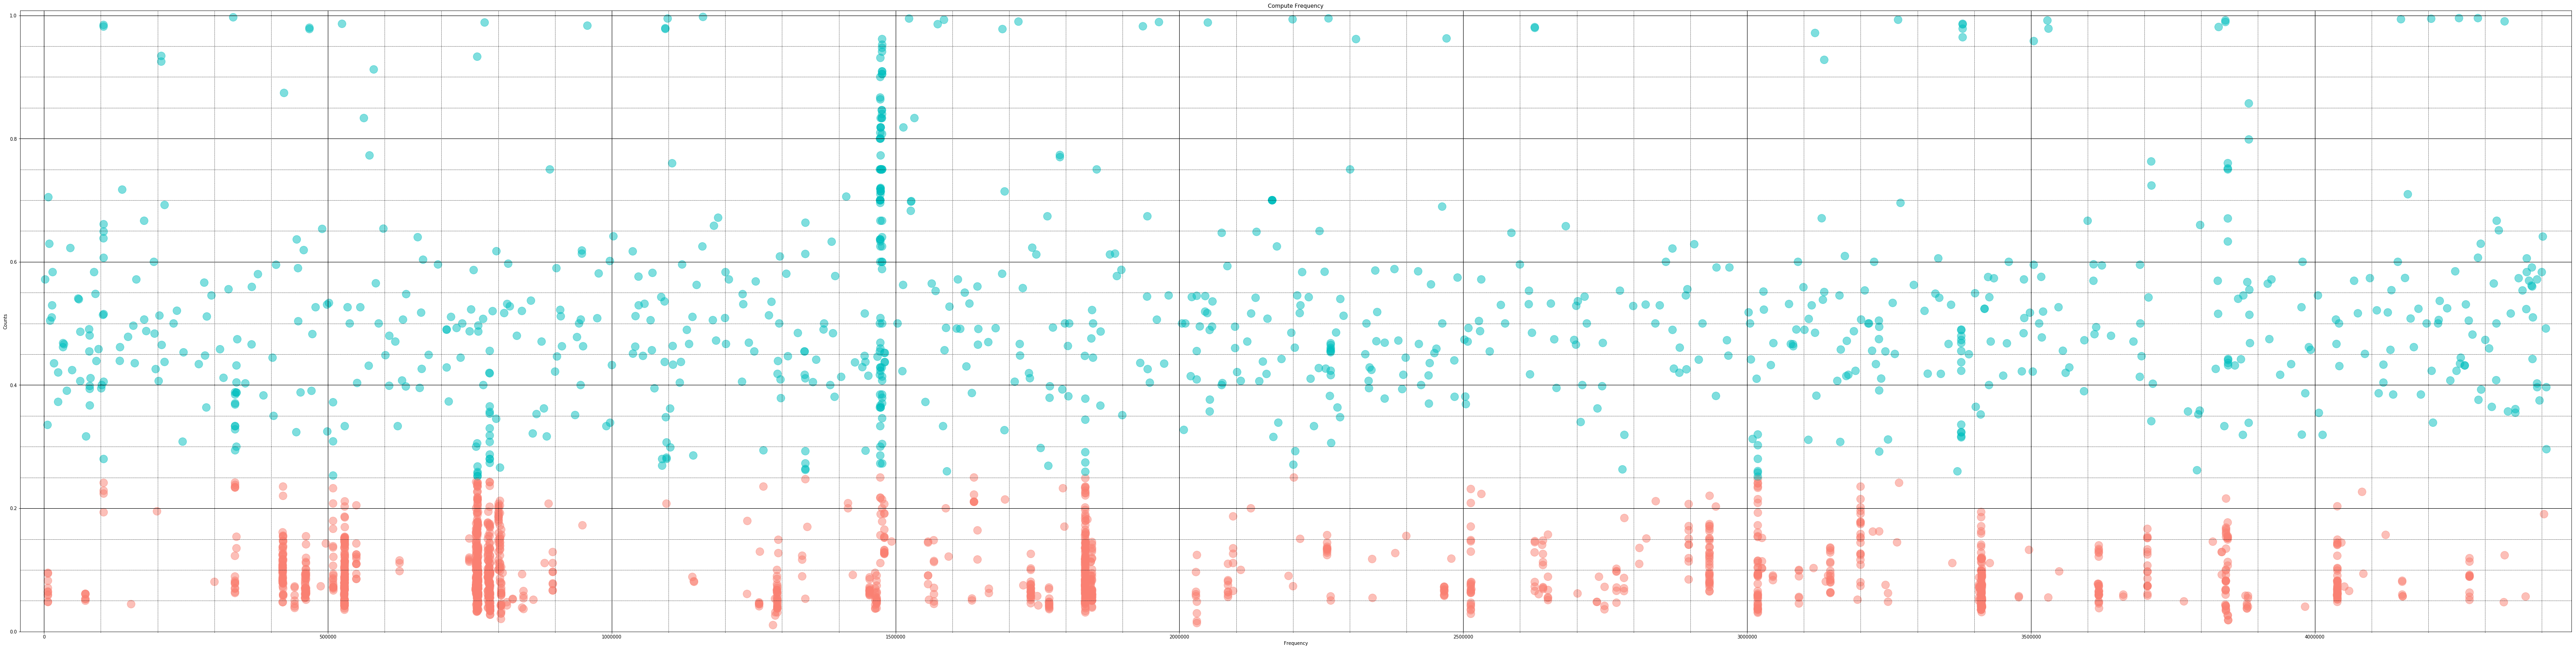

In [220]:
scatter_vcf_pos(vcf_PAIR15050_df)

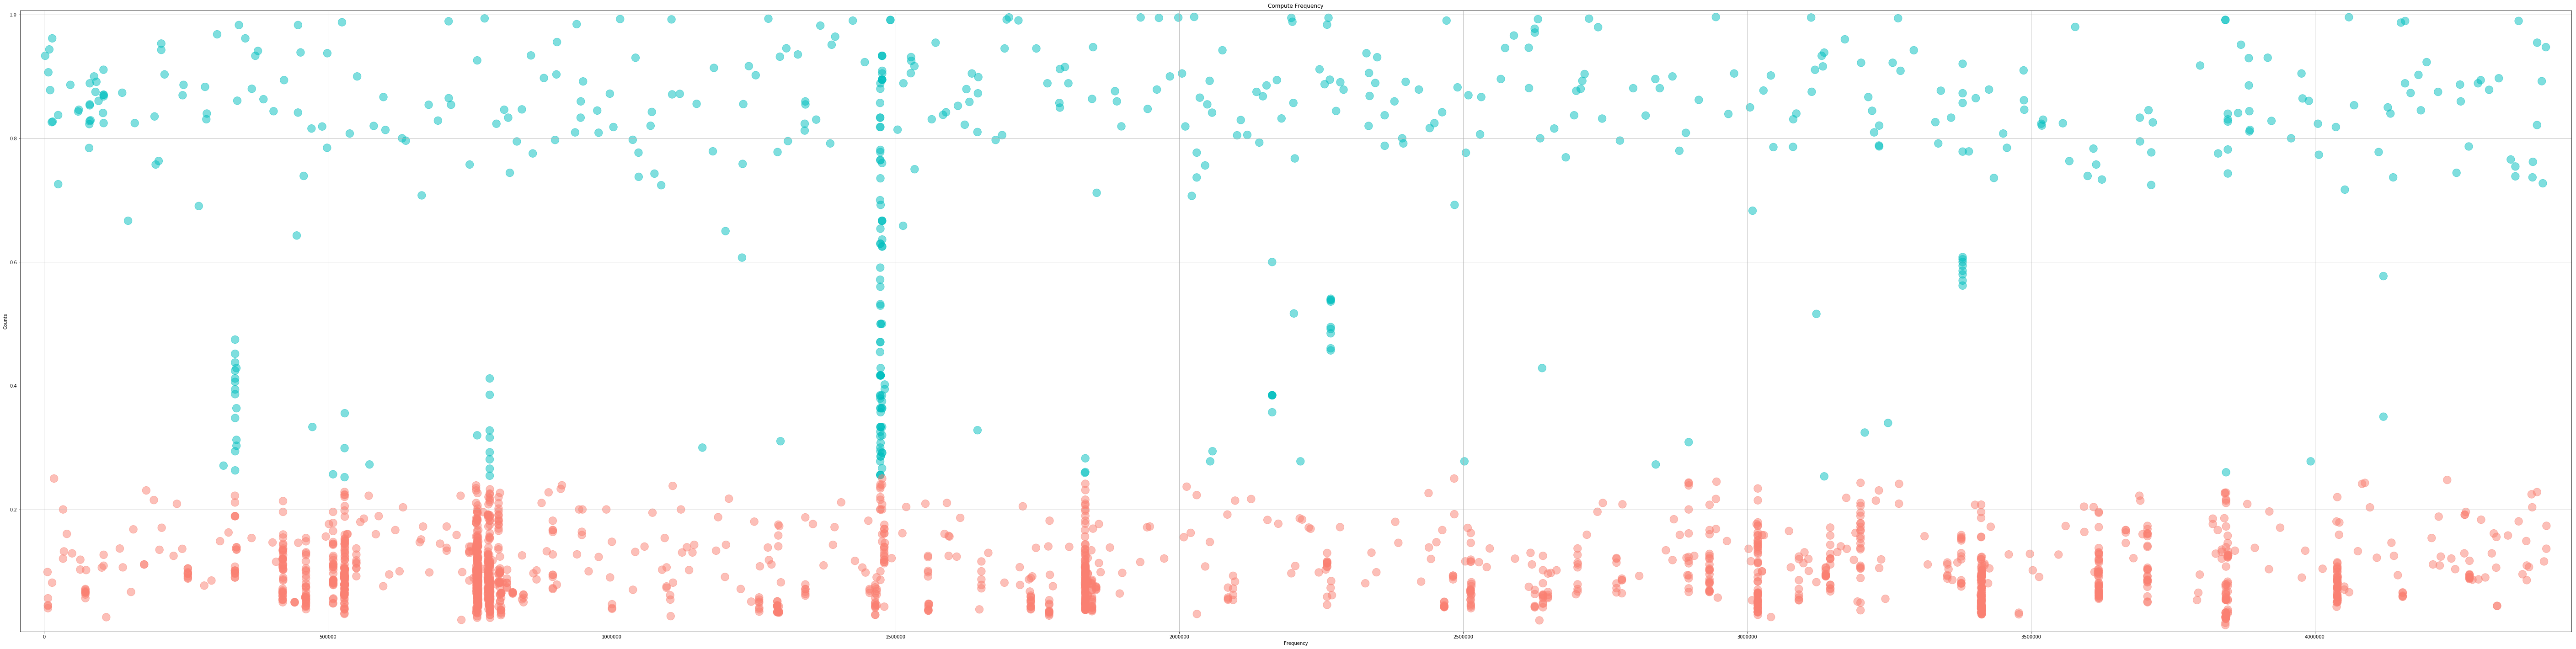

In [206]:
scatter_vcf_pos(vcf_PAIR18020_df)

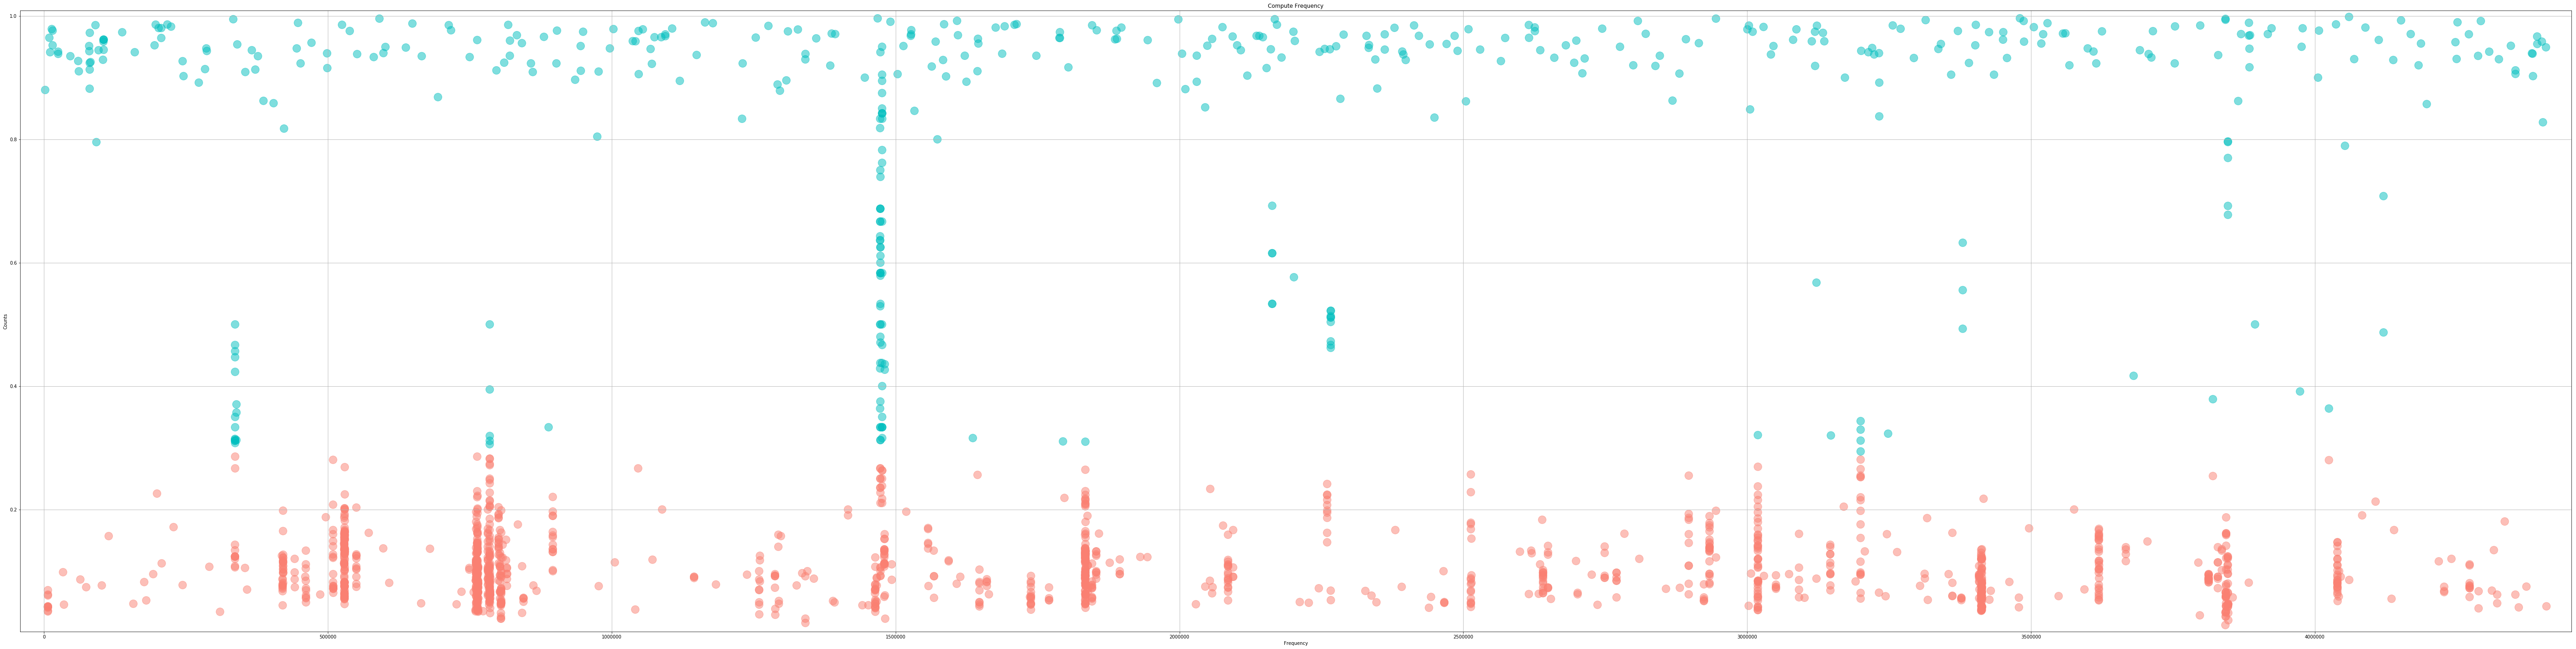

In [207]:
scatter_vcf_pos(vcf_PAIR19010_df)

In [66]:
def create_bin(bin, max):
    for i in range(1, max, bin):
        print(i,i+bin-1)

In [70]:
vcf_PAIR18020_df.tail(10)

#CHROM      POS ID REF ALT  QUAL FILTER  \
2948  MTB_anc  4395387  .   G   A  1257   PASS   
2949  MTB_anc  4399936  .   G   T  1636   PASS   
2950  MTB_anc  4401753  .   G   T   633   PASS   
2951  MTB_anc  4403900  .   A   G   127   PASS   
2952  MTB_anc  4407110  .   G   C  2361   PASS   
2953  MTB_anc  4407588  .   C   T  4934   PASS   
2954  MTB_anc  4407970  .   G   A   645   PASS   
2955  MTB_anc  4408156  .   A   C   376   PASS   
2956  MTB_anc  4408920  .   G   A  2293   PASS   
2957  MTB_anc  4408923  .   T   C  2677   PASS   

                                           INFO     DP        AF   SB  \
2948       DP=44;AF=1.000000;SB=0;DP4=0,0,18,26   44.0  1.000000  0.0   
2949       DP=65;AF=0.892308;SB=0;DP4=4,3,29,29   65.0  0.892308  0.0   
2950        DP=33;AF=0.727273;SB=1;DP4=6,3,19,5   33.0  0.727273  1.0   
2951       DP=69;AF=0.115942;SB=3;DP4=29,32,5,3   69.0  0.115942  3.0   
2952       DP=76;AF=0.947368;SB=0;DP4=2,2,30,42   76.0  0.947368  0.0   
2953      DP=178;AF=1.000000;SB=0;DP4=0,0,93,85  178.0  1.000000  0.0   
2954  DP=249;AF=0.136546;SB=0;DP4=104,111,16,18  249.0  0.136546  0.0   
2955     DP=121;AF=0.173554;SB=0;DP4=34,66,6,15  121.0  0.173554  0.0   
2956       DP=84;AF=1.000000;SB=0;DP4=0,0,31,53   84.0  1.000000  0.0   
2957       DP=82;AF=1.000000;SB=0;DP4=0,0,30,52   82.0  1.000000  0.0   

                DP4   Fref   Rref  Fsample  Rsample  
2948      0,0,18,26    0.0    0.0     18.0     26.0  
2949      4,3,29,29    4.0    3.0     29.0     29.0  
2950       6,3,19,5    6.0    3.0     19.0      5.0  
2951      29,32,5,3   29.0   32.0      5.0      3.0  
2952      2,2,30,42    2.0    2.0     30.0     42.0  
2953      0,0,93,85    0.0    0.0     93.0     85.0  
2954  104,111,16,18  104.0  111.0     16.0     18.0  
2955     34,66,6,15   34.0   66.0      6.0     15.0  
2956      0,0,31,53    0.0    0.0     31.0     53.0  
2957      0,0,30,52    0.0    0.0     30.0     52.0

In [72]:
print(len(vcf_PAIR18020_df.index.values))

2958


In [76]:
print(vcf_PAIR18020_df.loc[2955,'POS'])

4408156


In [96]:
def add_snp_distance(vcf_df):
    for index in vcf_df.index.values:
        if index > 0:
            vcf_df.loc[index,'snp_left_distance'] = vcf_df.loc[index,'POS'] - vcf_df.loc[index - 1,'POS']
        if index < (len(vcf_df.index.values) - 1):
            vcf_df.loc[index,'snp_right_distance'] = vcf_df.loc[index + 1,'POS'] - vcf_df.loc[index,'POS']
            
    return vcf_df

In [97]:
vcf_PAIR190_dist = add_snp_distance(vcf_PAIR19010_df)
vcf_PAIR180_dist = add_snp_distance(vcf_PAIR18020_df)
vcf_PAIR150_dist = add_snp_distance(vcf_PAIR15050_df)

In [102]:
vcf_PAIR180_dist.tail()

#CHROM      POS ID REF ALT  QUAL FILTER  \
2953  MTB_anc  4407588  .   C   T  4934   PASS   
2954  MTB_anc  4407970  .   G   A   645   PASS   
2955  MTB_anc  4408156  .   A   C   376   PASS   
2956  MTB_anc  4408920  .   G   A  2293   PASS   
2957  MTB_anc  4408923  .   T   C  2677   PASS   

                                           INFO     DP        AF   SB  \
2953      DP=178;AF=1.000000;SB=0;DP4=0,0,93,85  178.0  1.000000  0.0   
2954  DP=249;AF=0.136546;SB=0;DP4=104,111,16,18  249.0  0.136546  0.0   
2955     DP=121;AF=0.173554;SB=0;DP4=34,66,6,15  121.0  0.173554  0.0   
2956       DP=84;AF=1.000000;SB=0;DP4=0,0,31,53   84.0  1.000000  0.0   
2957       DP=82;AF=1.000000;SB=0;DP4=0,0,30,52   82.0  1.000000  0.0   

                DP4   Fref   Rref  Fsample  Rsample  snp_right_distance  \
2953      0,0,93,85    0.0    0.0     93.0     85.0               382.0   
2954  104,111,16,18  104.0  111.0     16.0     18.0               186.0   
2955     34,66,6,15   34.0   66.0      6.0     15.0               764.0   
2956      0,0,31,53    0.0    0.0     31.0     53.0                 3.0   
2957      0,0,30,52    0.0    0.0     30.0     52.0                 NaN   

      snp_left_distance  
2953              478.0  
2954              382.0  
2955              186.0  
2956              764.0  
2957                3.0

In [103]:
vcf_PAIR180_dist.head()

#CHROM   POS ID REF ALT  QUAL FILTER  \
0  MTB_anc  1977  .   G   A   686   PASS   
1  MTB_anc  2532  .   C   T  5589   PASS   
2  MTB_anc  6140  .   G   T   334   PASS   
3  MTB_anc  6812  .   C   A   137   PASS   
4  MTB_anc  6835  .   C   T   141   PASS   

                                     INFO     DP        AF   SB         DP4  \
0     DP=30;AF=0.933333;SB=0;DP4=1,1,19,9   30.0  0.933333  0.0    1,1,19,9   
1   DP=191;AF=1.000000;SB=0;DP4=0,0,97,94  191.0  1.000000  0.0   0,0,97,94   
2  DP=182;AF=0.098901;SB=3;DP4=82,82,11,7  182.0  0.098901  3.0  82,82,11,7   
3  DP=204;AF=0.044118;SB=0;DP4=102,93,5,4  204.0  0.044118  0.0  102,93,5,4   
4  DP=199;AF=0.045226;SB=0;DP4=109,81,5,4  199.0  0.045226  0.0  109,81,5,4   

    Fref  Rref  Fsample  Rsample  snp_right_distance  snp_left_distance  
0    1.0   1.0     19.0      9.0               555.0                NaN  
1    0.0   0.0     97.0     94.0              3608.0              555.0  
2   82.0  82.0     11.0      7.0               672.0             3608.0  
3  102.0  93.0      5.0      4.0                23.0              672.0  
4  109.0  81.0      5.0      4.0                 6.0               23.0

In [105]:
vcf_PAIR180_dist['snp_left_distance'].describe()

count     2957.000000
mean      1490.343591
std       2855.580984
min          0.000000
25%          6.000000
50%         29.000000
75%       1715.000000
max      28792.000000
Name: snp_left_distance, dtype: float64

In [106]:
def filter_by_distance(vcf_dist_df, distance):
    vcf_df_filtered_distance = vcf_dist_df[((vcf_dist_df['snp_right_distance'] > distance) | (vcf_dist_df['snp_left_distance'] > distance))]
    return vcf_df_filtered_distance

In [200]:
vcf_PAIR190_dist_filtered = filter_by_distance(vcf_PAIR190_dist, 1500)
vcf_PAIR180_dist_filtered = filter_by_distance(vcf_PAIR180_dist, 1500)
vcf_PAIR150_dist_filtered = filter_by_distance(vcf_PAIR150_dist, 1500)

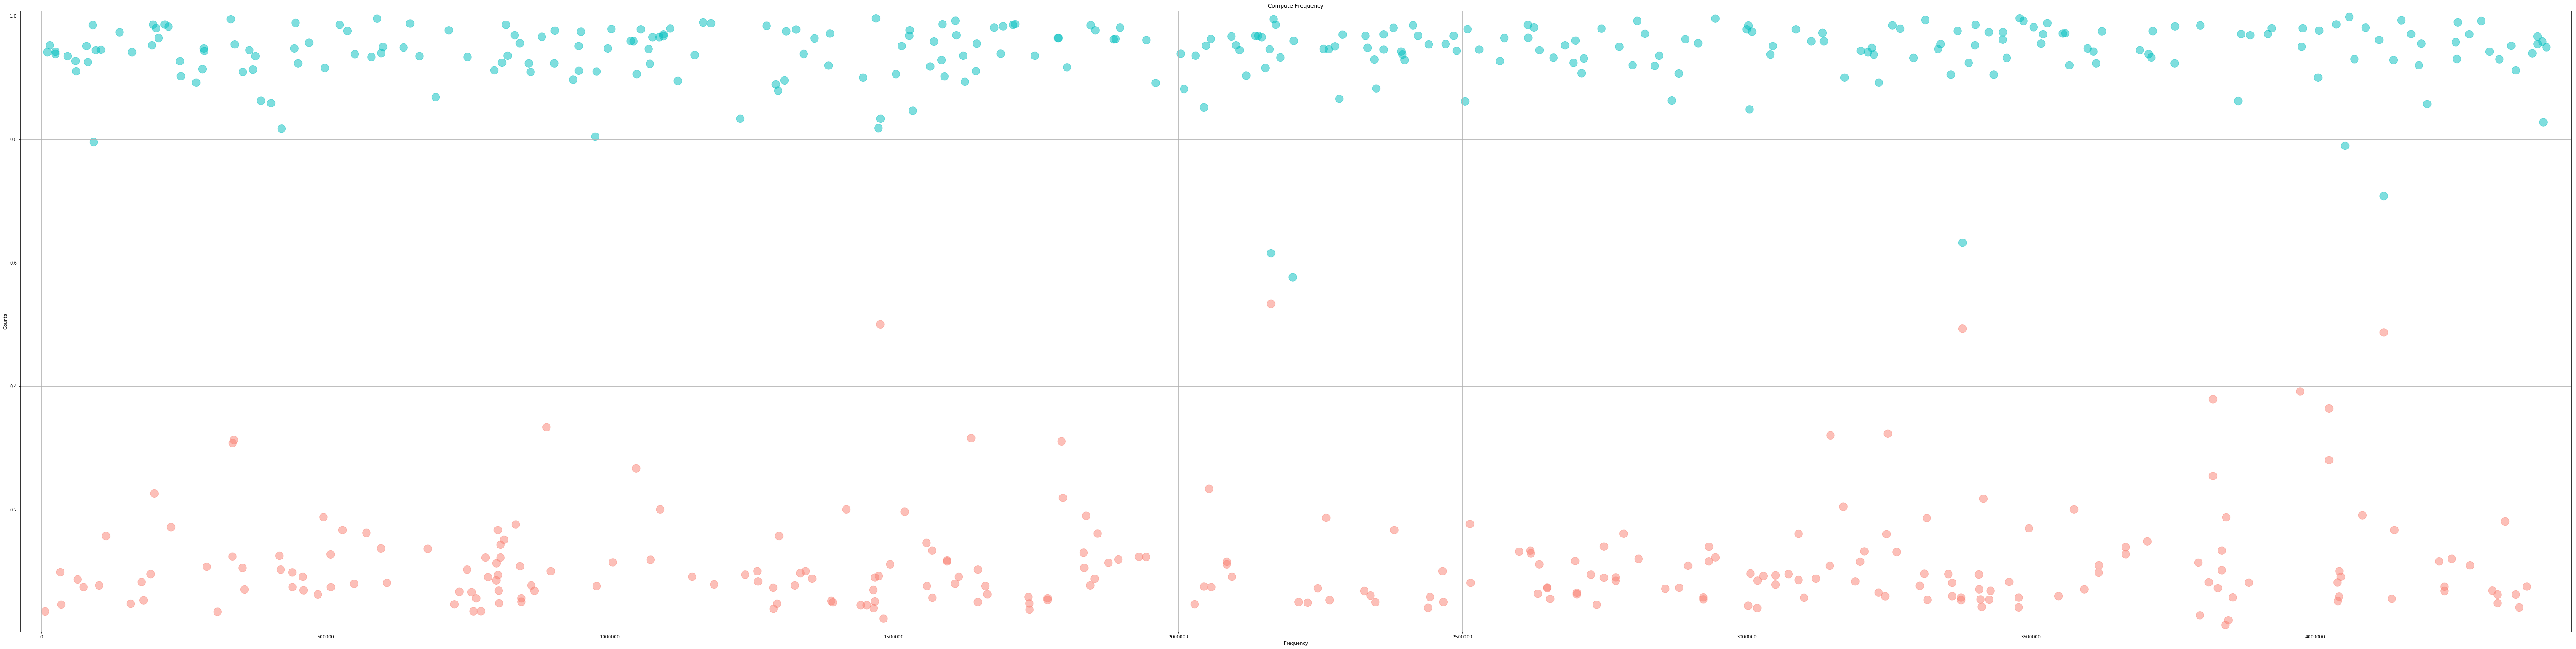

In [208]:
scatter_vcf_pos(vcf_PAIR190_dist_filtered)

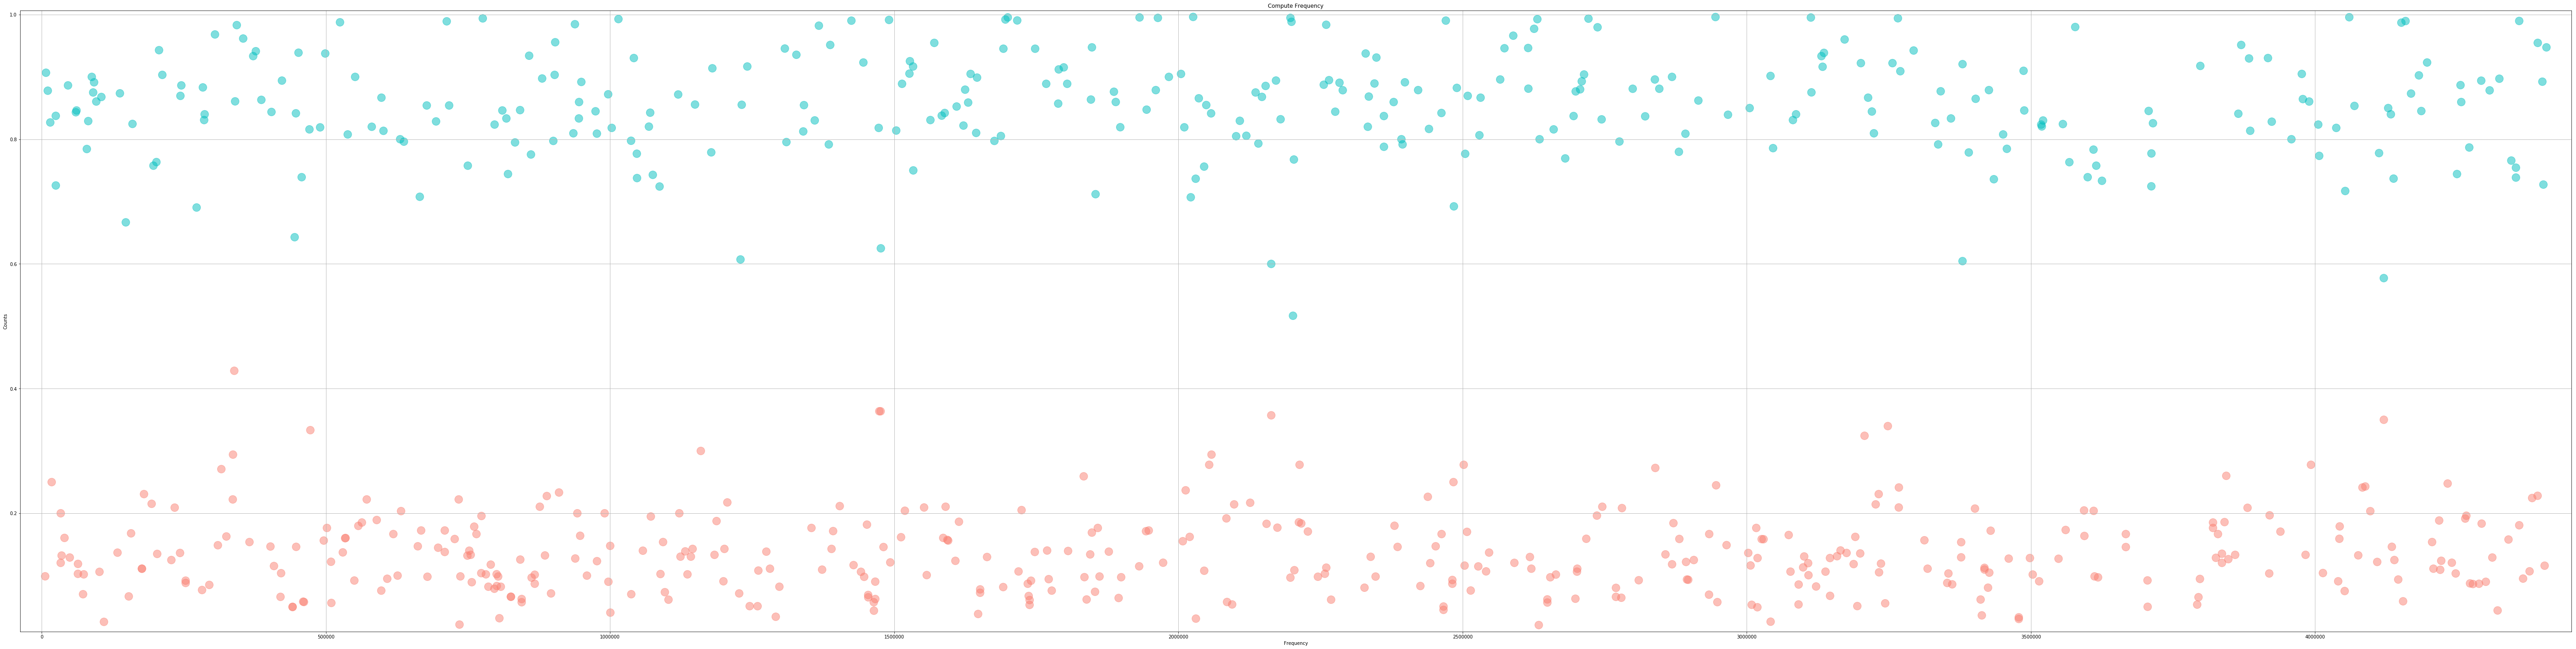

In [209]:
scatter_vcf_pos(vcf_PAIR180_dist_filtered)

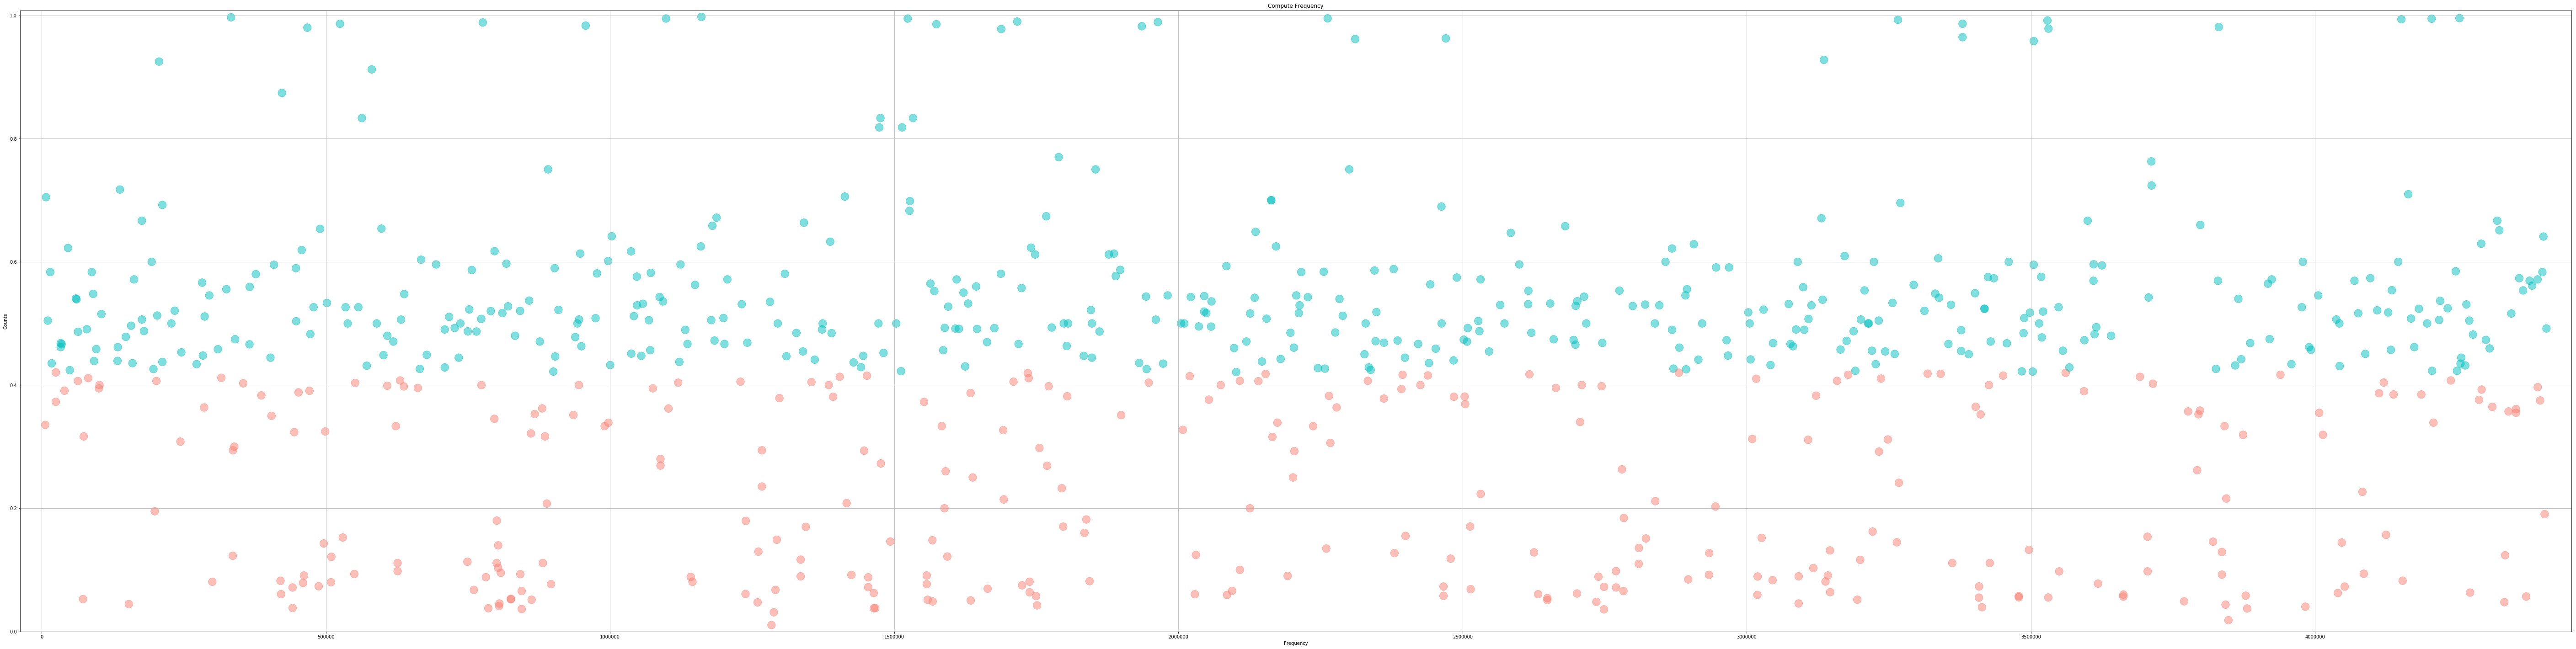

In [210]:
scatter_vcf_pos(vcf_PAIR150_dist_filtered)

In [199]:
vcf_PAIR150_dist_filtered['snp_right_distance'].dropna().describe()

count     1342.000000
mean      3200.412817
std       3358.961201
min          0.000000
25%        955.000000
50%       2226.500000
75%       4354.000000
max      28792.000000
Name: snp_right_distance, dtype: float64

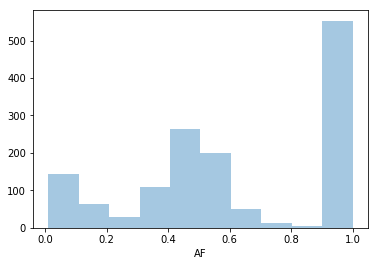

In [181]:
x = vcf_PAIR150_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)

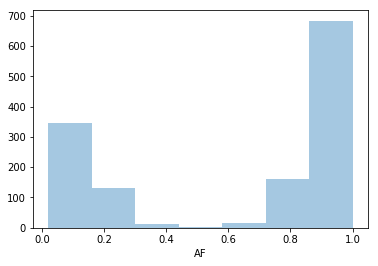

In [182]:
x = vcf_PAIR180_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)

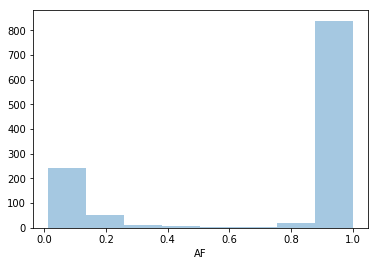

In [183]:
x = vcf_PAIR190_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)